# Import Libraries

In [256]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # train_test split function
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  # accurate calculation
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from helpers import scikit_cv_result_to_df
from plotters import plot_means_w_stds, gen_and_plot_learning_curve


# Read Data

In [2]:
# load data

data = pd.read_csv('pd_speech_features.csv')
# https://www.kaggle.com/dipayanbiswas/parkinsons-disease-speech-signal-features

display(data.info(verbose=True, null_counts=False))
#check null data
# print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 755 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   gender                          int64  
 2   PPE                             float64
 3   DFA                             float64
 4   RPDE                            float64
 5   numPulses                       int64  
 6   numPeriodsPulses                int64  
 7   meanPeriodPulses                float64
 8   stdDevPeriodPulses              float64
 9   locPctJitter                    float64
 10  locAbsJitter                    float64
 11  rapJitter                       float64
 12  ppq5Jitter                      float64
 13  ddpJitter                       float64
 14  locShimmer                      float64
 15  locDbShimmer                    float64
 16  apq3Shimmer                     float64
 17  apq5Shimmer                     fl

None

In [3]:
# summarize how many % existing customer, % attrited customer
data['class'].value_counts(normalize=True)

1    0.746032
0    0.253968
Name: class, dtype: float64

In [4]:
data.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

# Data Processing

In [5]:
y = data['class'].copy()

X = data.copy()
X.drop('class', inplace=True, axis=1)

# plot continuous features in the dataset

In [6]:
continuous_features = data.select_dtypes(['int64', 'float64']).columns.to_list()

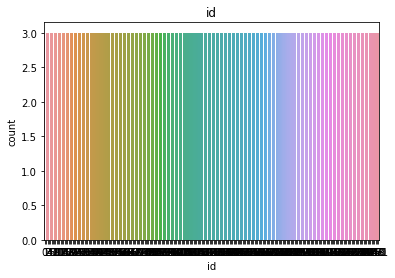

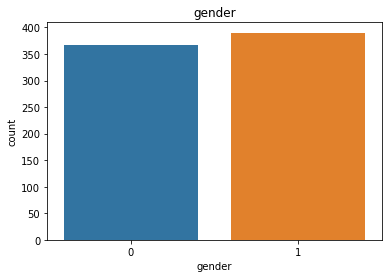

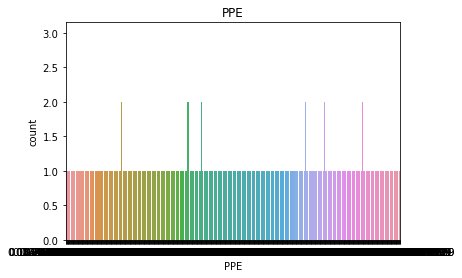

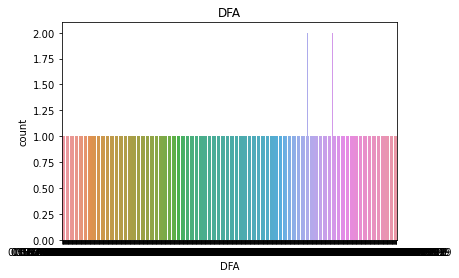

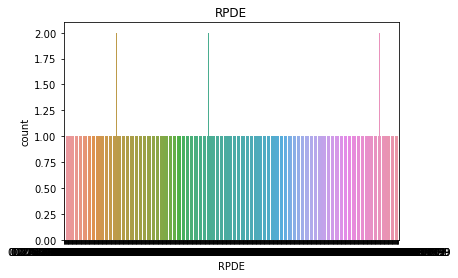

In [7]:
for fea in continuous_features[:5]:
    plt.figure()
    plt.title(fea)
    ax = sns.countplot(x=fea, data=data)

In [8]:
X.shape

(756, 754)

# Data Split

In [9]:
# split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build DT model
classifier = DecisionTreeClassifier(random_state=42)# random_state=42, it will be same after each random.
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate the DT model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.775330396475771


In [10]:
print('Number of instances: ', X.shape[0])
print('Size of Training set: ', X_train.shape[0])
print('Size of Test set: ', X_test.shape[0])
print('Number of instances: ', y.shape[0])
print('Size of Training set: ', y_train.shape[0])
print('Size of Test set: ', y_test.shape[0])

Number of instances:  756
Size of Training set:  529
Size of Test set:  227
Number of instances:  756
Size of Training set:  529
Size of Test set:  227


# Part1: Decision Tree

In [11]:
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
# dt_clf.get_params()
df_paramGrid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(2, 20),
}

In [12]:
df_gs = GridSearchCV(estimator=dt_clf, param_grid = df_paramGrid, scoring = 'accuracy',
                  cv=5, n_jobs=-1, verbose=10, return_train_score=True)

In [13]:
df_gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 20)},
             return_train_score=True, scoring='accuracy', verbose=10)

# Learning Curve

In [14]:
# gs_res_df = pd.DataFrame(gs.cv_results_)
# best_clf = gs.best_estimator_
# data.columns[np.argmax(best_clf.feature_importances_)]
# gs_res_df.sort_values(by='rank_test_score')
df_gs_res = cv_result_to_df(df_gs.cv_results_)
df_clf = df_gs.best_estimator_
data.columns[np.argmax(df_clf.feature_importances_)]
df_gs_res.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
criterion max_depth                                                 
gini      4               0.116783      0.003061         0.006263   
entropy   4               0.267061      0.009019         0.013441   
gini      7               0.176133      0.010913         0.008289   
          6               0.168652      0.007216         0.004445   
          3               0.095953      0.005634         0.006666   
entropy   2               0.123126      0.013216         0.009055   
gini      11              0.223919      0.031436         0.005843   
          12              0.218824      0.028898         0.006687   
          9               0.207344      0.013432         0.005626   
          10              0.206488      0.024268         0.003888   
          5               0.139737      0.010043         0.008003   
entropy   18              0.207693      0.010594         0.005026   
          17              0.196315      0.010022         0.006409   
          16              0.206611      0.013746         0.006121   
          19              0.191745      0.024105         0.006794   
          14              0.198055      0.016140         0.008014   
          13              0.195141      0.013155         0.007585   
          12              0.205906      0.016185         0.006174   
          11              0.203194      0.021358         0.005896   
          10              0.215032      0.017941         0.007130   
          9               0.217120      0.013032         0.004918   
          8               0.200592      0.015049         0.008618   
          15              0.191375      0.015461         0.003842   
gini      17              0.240353      0.046655         0.005355   
          16              0.233839      0.039896         0.008840   
          14              0.238972      0.037125         0.008071   
          13              0.224484      0.035714         0.008964   
          19              0.215307      0.025268         0.004392   
          18              0.234828      0.045809         0.007041   
          2               0.066796      0.003078         0.005055   
entropy   7               0.208432      0.010759         0.005597   
gini      15              0.245062      0.042692         0.005456   
entropy   6               0.195828      0.015159         0.005861   
          5               0.202325      0.057466         0.004157   
gini      8               0.190554      0.009714         0.004518   
entropy   3               0.158296      0.014008         0.013691   

                     std_score_time  mean_test_score  std_test_score  \
criterion max_depth                                                    
gini      4                0.002747         0.816622        0.012975   
entropy   4                0.005049         0.816604        0.029191   
gini      7                0.002614         0.810961        0.015802   
          6                0.001007         0.810907        0.022065   
          3                0.002591         0.810907        0.026466   
entropy   2                0.004058         0.809075        0.019220   
gini      11               0.002965         0.809057        0.015300   
          12               0.003555         0.807206        0.016187   
          9                0.001013         0.807170        0.014290   
          10               0.000091         0.807152        0.016826   
          5                0.005172         0.805247        0.018043   
entropy   18               0.002259         0.805211        0.036620   
          17               0.003107         0.805211        0.036620   
          16               0.000292         0.805211        0.036620   
          19               0.002667         0.805211        0.036620   
          14               0.005113         0.805211        0.036620   
          13               0.003885         0.805211        0.036620   
          12               0.0

In [15]:
entropy = df_gs_res.xs('entropy', level='criterion')
gini = df_gs_res.xs('gini', level='criterion')

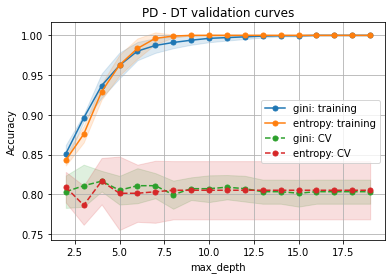

In [149]:
#Plot validation curve
plot_means_w_stds(
    means=(gini['mean_train_score'], entropy['mean_train_score'], gini['mean_test_score'], entropy['mean_test_score']),
    stds=(gini['std_train_score'], entropy['std_train_score'], gini['std_test_score'], entropy['std_test_score']),
    xrange=df_paramGrid['max_depth'],
    xlabel='max_depth',
    ylabel='Accuracy',
    series_labels=('gini: training', 'entropy: training', 'gini: CV', 'entropy: CV'),
    title='PD - DT validation curves',
    ylim=None,
    markersize=None
)

In [17]:
gini_fit_mean, entropy_fit_mean = np.split(df_gs_res['mean_fit_time'], 2)
gini_fit_std, entropy_fit_std = np.split(df_gs_res['std_fit_time'], 2)

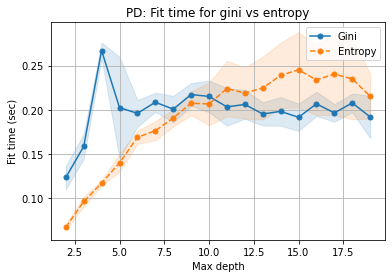

In [150]:
plot_means_w_stds(
    means=(gini_fit_mean, entropy_fit_mean),
    stds=(gini_fit_std, entropy_fit_std),
    xrange=df_paramGrid['max_depth'],
    series_labels=('Gini', 'Entropy'),
    ylabel='Fit time (sec)',
    xlabel='Max depth',
    title='PD: Fit time for gini vs entropy'
)

In [26]:

best_params = df_gs.cv_results_['params'][np.argmax(df_gs_res['mean_test_score'])]
print(best_params)

print(np.max(df_gs_res['mean_test_score']))

{'criterion': 'gini', 'max_depth': 4}
0.8166217430368373


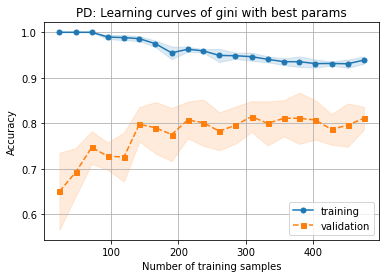

In [186]:
#Learning curver of gini (best param) #gini depth 4
dt_clf = DecisionTreeClassifier(**best_params)
train_sizes, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(df_clf, X_train, y_train, ylim=None, cv=10, 
                                                                                      train_sizes=np.linspace(.05, 1.0, 20), scoring='accuracy',
                                                                                     title='PD: Learning curves of gini with best params')

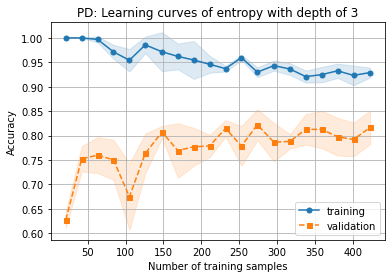

In [191]:
dt_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
train_sizes2, train_mean2, train_std2, test_mean2, test_std2 = gen_and_plot_learning_curve(dt_clf2, X_train, y_train, ylim=None, cv=5, 
                                                                                           train_sizes=np.linspace(.05, 1.0, 20), scoring='accuracy',
                                                                                          title='PD: Learning curves of entropy with depth of 3')

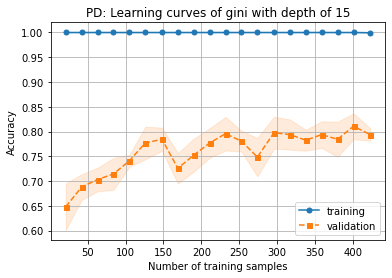

In [192]:
dt_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=15)
train_sizes3, train_mean3, train_std3, test_mean3, test_std3 = gen_and_plot_learning_curve(dt_clf3, X_train, y_train, ylim=None, cv=5, 
                                                                                           train_sizes=np.linspace(.05, 1.0, 20), scoring='accuracy',
                                                                                          title='PD: Learning curves of gini with depth of 15')

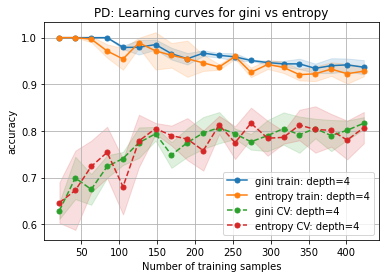

In [154]:
# Compare gini vs entropy
plot_means_w_stds(
    (train_mean, train_mean2, test_mean, test_mean2),
    (train_std, train_std2, test_std, test_std2),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['gini train: depth=4', 'entropy train: depth=4', 'gini CV: depth=4', 'entropy CV: depth=4'],
    title='PD: Learning curves for gini vs entropy'
)

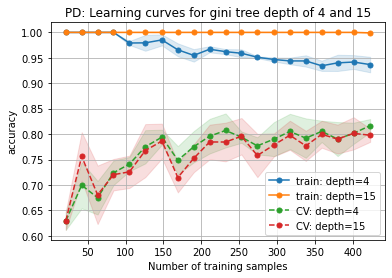

In [155]:
# Compare tree depth impact (gini)
plot_means_w_stds(
    (train_mean, train_mean3, test_mean, test_mean3),
    (train_std, train_std3, test_std, test_std3),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['train: depth=4', 'train: depth=15', 'CV: depth=4', 'CV: depth=15'],
    title='PD: Learning curves for gini tree depth of 4 and 15'
)

In [261]:
# calculate test set accuracy (gini)
start_time = time.time()
dt_clf.fit(X_train, y_train)
end_time = time.time()
dt_time = end_time - start_time
y_test_pred = dt_clf.predict(X_test)

print(dt_time)
print(metrics.accuracy_score(y_test, y_test_pred))
dt_test_score = metrics.accuracy_score(y_test, y_test_pred)

dt_clf2.fit(X_train, y_train)
y_test_pred2 = dt_clf2.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred2))

0.1343240737915039
0.8149779735682819
0.8149779735682819


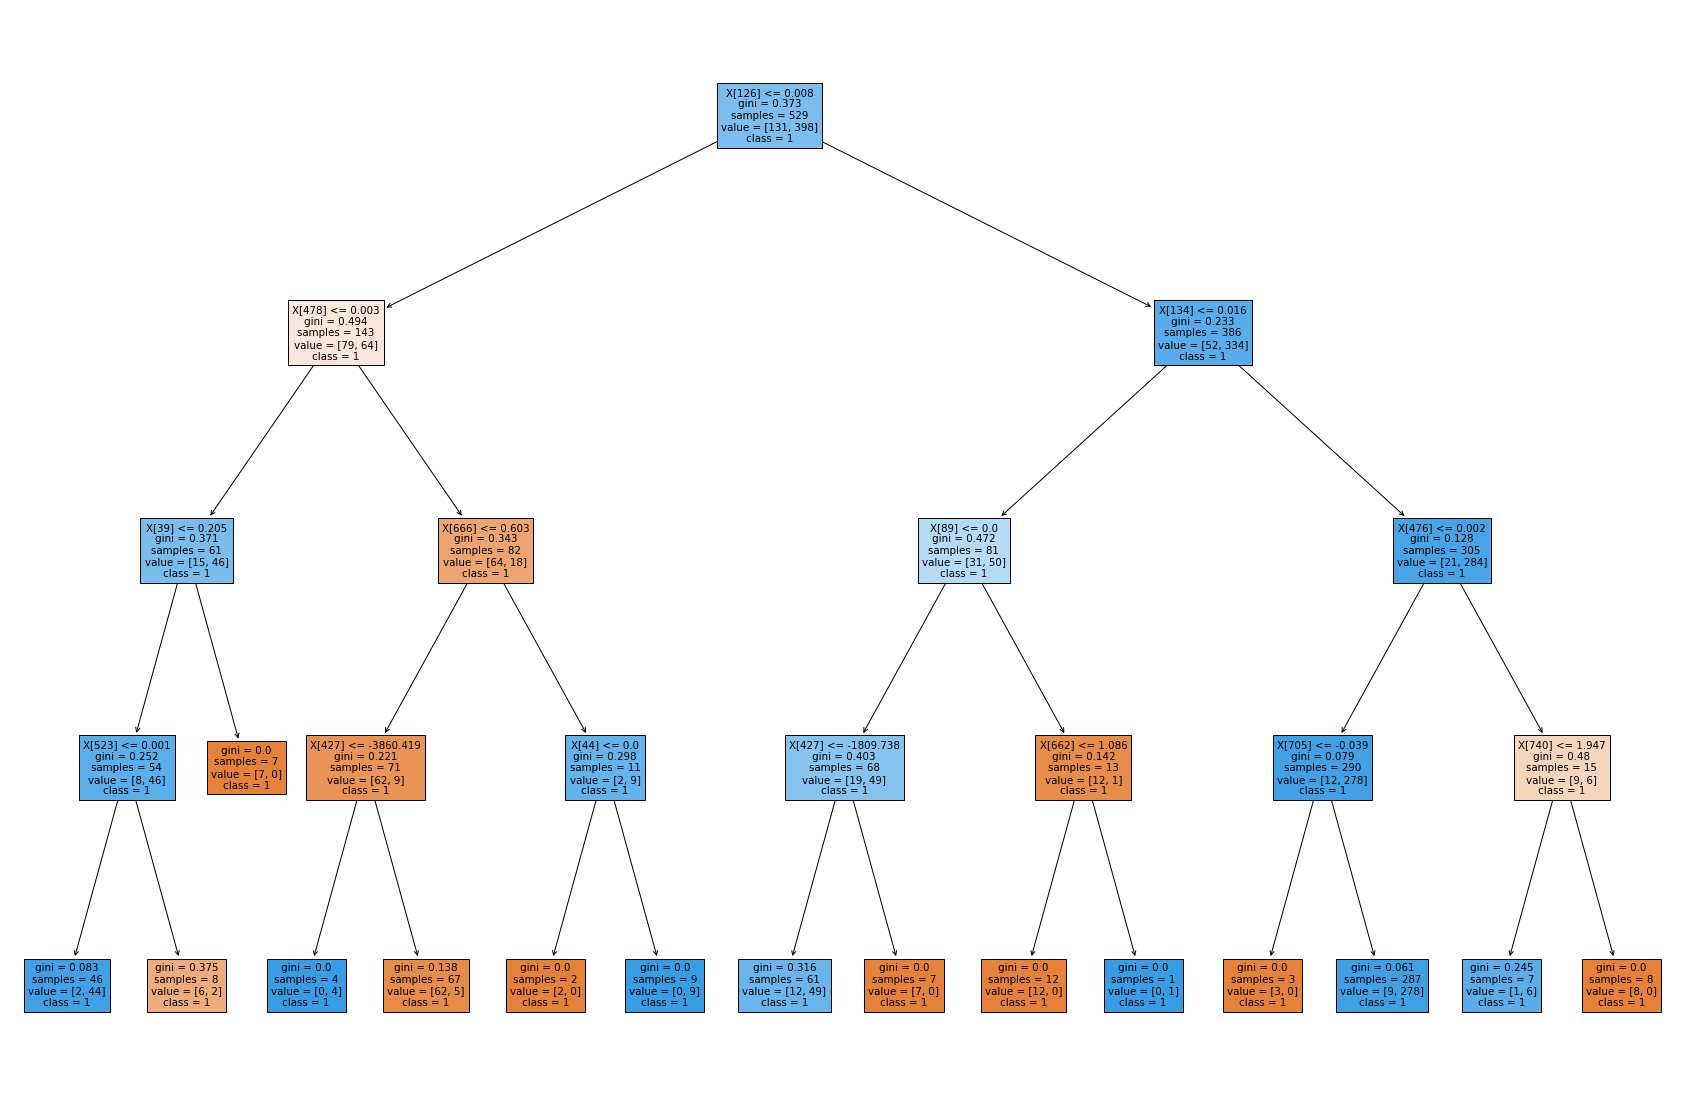

In [198]:
import sklearn.tree as tree
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(dt_clf, 
                   max_depth = 4,
                   class_names=data['class'].astype('str'),
                   filled=True)

# Part 2: SVM

In [38]:
#create Linear SVM
from sklearn.svm import LinearSVC
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import MinMaxScaler

In [39]:
#machine learning algorithms perform better when numerical input variables are scaled to a standard range
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
#Create RBF SVM

from sklearn.svm import SVC

rbf_clf = SVC(kernel='rbf', random_state=1)

rbf_paramGrid = {
    'C': np.logspace(-3, 3, 7),
    'max_iter': np.logspace(1, 5, 5),
    'gamma': np.logspace(-5, 1, 7),
}
rbf_paramGrid

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'max_iter': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}

In [158]:
rbf_gs = GridSearchCV(
    estimator=rbf_clf,
    param_grid=rbf_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [159]:
rbf_gs.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 245 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=4, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'max_iter': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [160]:
#RBF
rbf_res_df = scikit_cv_result_to_df(rbf_gs.cv_results_)
# best_clf = rbf_grid_search.best_estimator_
rbf_res_df.sort_values(by='rank_test_score')

,,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
C,gamma,max_iter,,,,,,,,,
100.0,0.10,100.0,0.069471,0.007523,0.023101,0.001480,0.907339,0.030087,1,1.000000,0.000000
10.0,0.10,100.0,0.068311,0.001492,0.021207,0.001026,0.907339,0.030087,1,1.000000,0.000000
1000.0,0.10,100.0,0.066429,0.012835,0.024644,0.006699,0.907339,0.030087,1,1.000000,0.000000
100.0,0.10,10000.0,0.135079,0.006715,0.034668,0.001100,0.903580,0.028571,4,1.000000,0.000000
10.0,0.10,100000.0,0.147419,0.007188,0.035191,0.002804,0.903580,0.028571,4,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1000.0,1.00,10.0,0.016673,0.003967,0.003339,0.000950,0.467034,0.196939,240,0.481985,0.183709
100.0,1.00,10.0,0.014163,0.000340,0.003091,0.000759,0.467034,0.196939,240,0.481985,0.183709
1000.0,0.01,10.0,0.008311,0.000257,0.002241,0.000057,0.444236,0.085431,243,0.473849,0.058279


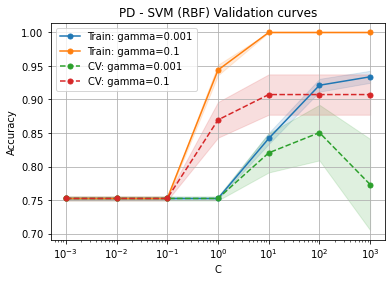

In [199]:
# Interesting cross sections above include gamma = 10^-1 and 10^-3
rbf_validation_curve1 = rbf_res_df.xs((100.0, 0.001), level=('max_iter', 'gamma'))
rbf_validation_curve2 = rbf_res_df.xs((100.0, 0.1), level=('max_iter', 'gamma'))
means = [rbf_validation_curve1['mean_train_score'], rbf_validation_curve2['mean_train_score'], rbf_validation_curve1['mean_test_score'], rbf_validation_curve2['mean_test_score']]
stds = [rbf_validation_curve1['std_train_score'], rbf_validation_curve2['std_train_score'], rbf_validation_curve1['std_test_score'], rbf_validation_curve2['std_test_score']]
labels = ['Train: gamma=0.001', 'Train: gamma=0.1', 'CV: gamma=0.001', 'CV: gamma=0.1']

plot_means_w_stds(means,stds,rbf_paramGrid['C'], series_labels=labels, ylabel='Accuracy', xlabel='C', logx=True, title='PD - SVM (RBF) Validation curves', legend=True)

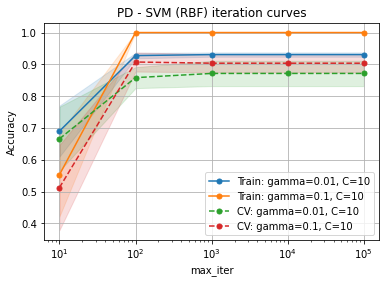

In [200]:
rbf_iter_curve1 = rbf_res_df.xs((10.0, 0.01), level=('C', 'gamma'))
rbf_iter_curve2 = rbf_res_df.xs((10.0, 0.1), level=('C', 'gamma'))
means = [rbf_iter_curve1['mean_train_score'], rbf_iter_curve2['mean_train_score'], rbf_iter_curve1['mean_test_score'], rbf_iter_curve2['mean_test_score']]
stds = [rbf_iter_curve1['std_train_score'], rbf_iter_curve2['std_train_score'], rbf_iter_curve1['std_test_score'], rbf_iter_curve2['std_test_score']]
labels = ['Train: gamma=0.01, C=10', 'Train: gamma=0.1, C=10', 'CV: gamma=0.01, C=10', 'CV: gamma=0.1, C=10']

plot_means_w_stds(means, stds, rbf_paramGrid['max_iter'], series_labels=labels, ylabel='Accuracy', xlabel='max_iter', logx=True, title='PD - SVM (RBF) iteration curves', legend=True)

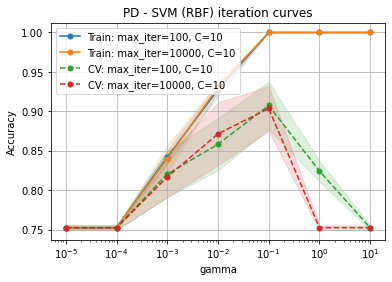

In [201]:
rbf_iter_curve1 = rbf_res_df.xs((10, 100), level=('C', 'max_iter'))
rbf_iter_curve2 = rbf_res_df.xs((10, 10000), level=('C', 'max_iter'))
means = [rbf_iter_curve1['mean_train_score'], rbf_iter_curve2['mean_train_score'], rbf_iter_curve1['mean_test_score'], rbf_iter_curve2['mean_test_score']]
stds = [rbf_iter_curve1['std_train_score'], rbf_iter_curve2['std_train_score'], rbf_iter_curve1['std_test_score'], rbf_iter_curve2['std_test_score']]
labels = ['Train: max_iter=100, C=10', 'Train: max_iter=10000, C=10', 'CV: max_iter=100, C=10', 'CV: max_iter=10000, C=10']

plot_means_w_stds(means, stds, rbf_paramGrid['gamma'], series_labels=labels, ylabel='Accuracy', xlabel='gamma', logx=True, title='PD - SVM (RBF) iteration curves', legend=True)

In [57]:
rbf_gs.best_estimator_.get_params()

{'C': 10.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': 100.0,
 'probability': False,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [59]:
#Create Sigmoid SVM

from sklearn.svm import SVC

sigmoid_clf = SVC(kernel='sigmoid', random_state=1)

sigmoid_paramGrid = {
    'C': np.logspace(-3, 3, 7),
    'max_iter': np.logspace(1, 5, 5),
    'gamma': np.logspace(-5, 1, 7),
}
sigmoid_paramGrid

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'max_iter': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}

In [61]:
sigmoid_gs = GridSearchCV(
    estimator=sigmoid_clf,
    param_grid=sigmoid_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [62]:
sigmoid_gs.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 245 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=4, estimator=SVC(kernel='sigmoid', random_state=1), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'max_iter': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [63]:
#RBF
sigmoid_res_df = scikit_cv_result_to_df(sigmoid_gs.cv_results_)
# best_clf = sigmoid_grid_search.best_estimator_
sigmoid_res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
C      gamma   max_iter                                                 
1000.0 0.0001  100000.0       0.075946      0.003182         0.022210   
100.0  0.0010  100000.0       0.078931      0.002521         0.022606   
               10000.0        0.077934      0.003998         0.022713   
               1000.0         0.074426      0.002732         0.023257   
1000.0 0.0001  1000.0         0.074267      0.003727         0.021900   
...                                ...           ...              ...   
1.0    0.1000  10.0           0.011729      0.002366         0.003189   
1000.0 0.0100  10.0           0.013083      0.005236         0.002807   
       0.0010  10.0           0.011198      0.002520         0.003634   
0.1    1.0000  10.0           0.011962      0.002438         0.005045   
       10.0000 10.0           0.013499      0.002874         0.003194   

                         std_score_time  mean_test_score  std_test_score  \
C      gamma   max_iter                                                    
1000.0 0.0001  100000.0        0.000630         0.871411        0.035258   
100.0  0.0010  100000.0        0.001871         0.871411        0.035258   
               10000.0         0.001364         0.871411        0.035258   
               1000.0          0.003634         0.871411        0.035258   
1000.0 0.0001  1000.0          0.000583         0.871411        0.035258   
...                                 ...              ...             ...   
1.0    0.1000  10.0            0.000740         0.665328        0.066249   
1000.0 0.0100  10.0            0.001110         0.636876        0.101396   
       0.0010  10.0            0.000901         0.538933        0.074782   
0.1    1.0000  10.0            0.002168         0.247636        0.003105   
       10.0000 10.0            0.000905         0.247636        0.003105   

                         rank_test_score  mean_train_score  std_train_score  
C      gamma   max_iter                                                      
1000.0 0.0001  100000.0                1          0.897917         0.009043  
100.0  0.0010  100000.0                1          0.897287         0.008472  
               10000.0                 1          0.897287         0.008472  
               1000.0                  1          0.897287         0.008472  
1000.0 0.0001  1000.0                  1          0.897917         0.009043  
...                                  ...               ...              ...  
1.0    0.1000  10.0                  240          0.696932         0.054986  
1000.0 0.0100  10.0                  242          0.667999         0.135745  
       0.0010  10.0                  243          0.550712         0.023093  
0.1    1.0000  10.0                  244          0.247637         0.001033  
       10.0000 10.0                  244          0.247637         0.001033  

[245 rows x 9 columns]

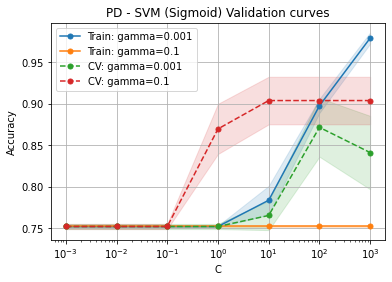

In [164]:
# cross sections above include gamma = 10^-1 and 10^-3
sigmoid_validation_curve1 = sigmoid_res_df.xs((10000.0, 0.001), level=('max_iter', 'gamma'))
sigmoid_validation_curve2 = sigmoid_res_df.xs((10000.0, 0.1), level=('max_iter', 'gamma'))
means = [sigmoid_validation_curve1['mean_train_score'], sigmoid_validation_curve2['mean_train_score'], sigmoid_validation_curve1['mean_test_score'], rbf_validation_curve2['mean_test_score']]
stds = [sigmoid_validation_curve1['std_train_score'], sigmoid_validation_curve2['std_train_score'], sigmoid_validation_curve1['std_test_score'], rbf_validation_curve2['std_test_score']]
labels = ['Train: gamma=0.001', 'Train: gamma=0.1', 'CV: gamma=0.001', 'CV: gamma=0.1']

plot_means_w_stds(means,stds,sigmoid_paramGrid['C'], series_labels=labels, ylabel='Accuracy', xlabel='C', logx=True, title='PD - SVM (Sigmoid) Validation curves', legend=True)

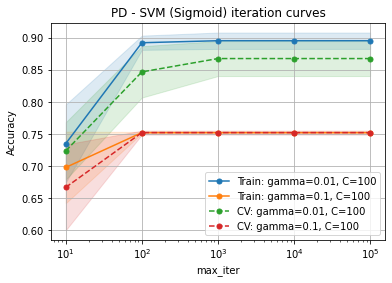

In [165]:
sigmoid_iter_curve1 = sigmoid_res_df.xs((100.0, 0.01), level=('C', 'gamma'))
sigmoid_iter_curve2 = sigmoid_res_df.xs((100.0, 0.1), level=('C', 'gamma'))
means = [sigmoid_iter_curve1['mean_train_score'], sigmoid_iter_curve2['mean_train_score'], sigmoid_iter_curve1['mean_test_score'], sigmoid_iter_curve2['mean_test_score']]
stds = [sigmoid_iter_curve1['std_train_score'], sigmoid_iter_curve2['std_train_score'], sigmoid_iter_curve1['std_test_score'], sigmoid_iter_curve2['std_test_score']]
labels = ['Train: gamma=0.01, C=100', 'Train: gamma=0.1, C=100', 'CV: gamma=0.01, C=100', 'CV: gamma=0.1, C=100']

plot_means_w_stds(means, stds, sigmoid_paramGrid['max_iter'], series_labels=labels, ylabel='Accuracy', xlabel='max_iter', logx=True, title='PD - SVM (Sigmoid) iteration curves', legend=True)

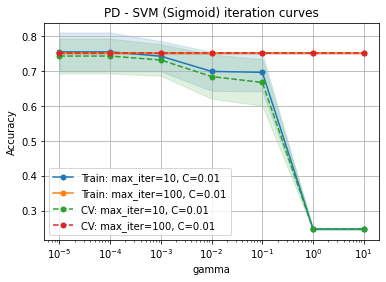

In [166]:
sigmoid_iter_curve1 = sigmoid_res_df.xs((0.1, 10), level=('C', 'max_iter'))
sigmoid_iter_curve2 = sigmoid_res_df.xs((0.01, 100), level=('C', 'max_iter'))
means = [sigmoid_iter_curve1['mean_train_score'], sigmoid_iter_curve2['mean_train_score'], sigmoid_iter_curve1['mean_test_score'], sigmoid_iter_curve2['mean_test_score']]
stds = [sigmoid_iter_curve1['std_train_score'], sigmoid_iter_curve2['std_train_score'], sigmoid_iter_curve1['std_test_score'], sigmoid_iter_curve2['std_test_score']]
labels = ['Train: max_iter=10, C=0.01', 'Train: max_iter=100, C=0.01', 'CV: max_iter=10, C=0.01', 'CV: max_iter=100, C=0.01']

plot_means_w_stds(means, stds, sigmoid_paramGrid['gamma'], series_labels=labels, ylabel='Accuracy', xlabel='gamma', logx=True, title='PD - SVM (Sigmoid) iteration curves', legend=True)

# Learning curve of RBF & Sigmoid SVM

{'C': 10.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100.0, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


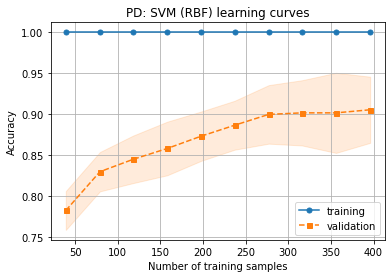

In [205]:
#RBF SVM learning curve
best_clf = rbf_gs.best_estimator_
print(best_clf.get_params())
train_sizes, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(best_clf, X_train_scaled, y_train, 
                                                                                      scoring='accuracy', ylabel='Accuracy', cv=4, n_jobs=-1, title='PD: SVM (RBF) learning curves')

{'C': 100.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'sigmoid', 'max_iter': 1000.0, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


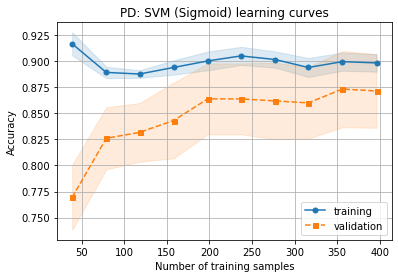

In [206]:
#Sigmoid SVM learning curve
best_clf2 = sigmoid_gs.best_estimator_
print(best_clf2.get_params())
train_sizes2, train_mean2, train_std2, test_mean2, test_std2 = gen_and_plot_learning_curve(best_clf2, X_train_scaled, y_train, 
                                                                                      scoring='accuracy', ylabel='Accuracy', cv=4, n_jobs=-1, title='PD: SVM (Sigmoid) learning curves')

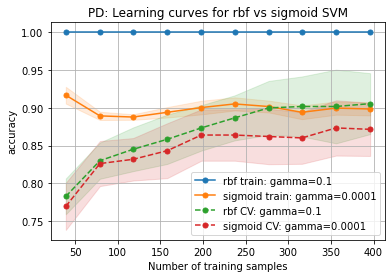

In [207]:
# Compare rbf vs sigmoid
plot_means_w_stds(
    (train_mean, train_mean2, test_mean, test_mean2),
    (train_std, train_std2, test_std, test_std2),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['rbf train: gamma=0.1', 'sigmoid train: gamma=0.0001', 'rbf CV: gamma=0.1', 'sigmoid CV: gamma=0.0001'],
    title='PD: Learning curves for rbf vs sigmoid SVM'
)

In [73]:
# the best SVM clf with rbf kernal is better than that with sigmoid kernal, especially when the training samples are larger than 100. 

In [260]:
# calculate test set accuracy (RBF SVM)
start_time = time.time()
best_clf.fit(X_train_scaled, y_train)

end_time = time.time()
svm_time = end_time - start_time

y_test_pred = best_clf.predict(X_test_scaled)


rbf_svm_accuracy = metrics.accuracy_score(y_test, y_test_pred)
svm_test_score = metrics.accuracy_score(y_test, y_test_pred)

#sigmoid
best_clf2.fit(X_train_scaled, y_train)
y_test_pred2 = best_clf2.predict(X_test_scaled)

sigmoid_svm_accuracy = metrics.accuracy_score(y_test, y_test_pred2)
print(rbf_svm_accuracy)
print(sigmoid_svm_accuracy)

0.9118942731277533
0.8590308370044053


/Users/jian/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


# Part 3: Boosting

In [74]:
# Gradient Boosting
# different hyperparameters
from sklearn.ensemble import GradientBoostingClassifier as gbm


In [82]:
#Create Gradient Boosting

gbm_clf = gbm(random_state=1)

gbm_paramGrid = {
    'n_estimators': np.array([10, 50, 100, 200]).astype('int'),
    'learning_rate': np.array([0.1, 0.5, 1]),
    'max_depth': range(1, 20),
}
gbm_paramGrid

{'n_estimators': array([ 10,  50, 100, 200]),
 'learning_rate': array([0.1, 0.5, 1. ]),
 'max_depth': range(1, 20)}

In [83]:
gbm_gs = GridSearchCV(
    estimator=gbm_clf,
    param_grid=gbm_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [84]:
gbm_gs.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 228 candidates, totalling 912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.5, 1. ]),
                         'max_depth': range(1, 20),
                         'n_estimators': array([ 10,  50, 100, 200])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [85]:
gbm_res_df = scikit_cv_result_to_df(gbm_gs.cv_results_)
# best_clf = rbf_grid_search.best_estimator_
gbm_res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  \
learning_rate max_depth n_estimators                                
1.0           6         100              945.958713      0.101875   
0.5           4         100                9.377489      0.068691   
0.1           4         200               18.417611      0.201281   
              5         200               22.578293      0.276801   
              4         100                9.161898      0.096800   
...                                             ...           ...   
1.0           15        200             1004.518688      6.809717   
              17        200              997.343144      7.033598   
              16        200              278.399645    420.346035   
              18        200              266.012020    398.375225   
              19        200              940.384612      4.210087   

                                      mean_score_time  std_score_time  \
learning_rate max_depth n_estimators                                    
1.0           6         100                  0.002056        0.000781   
0.5           4         100                  0.000972        0.000093   
0.1           4         200                  0.001988        0.000789   
              5         200                  0.001809        0.000484   
              4         100                  0.001439        0.000618   
...                                               ...             ...   
1.0           15        200                  0.002582        0.000478   
              17        200                  0.002123        0.000698   
              16        200                  0.002444        0.000679   
              18        200                  0.002796        0.001099   
              19        200                  0.002276        0.000098   

                                      mean_test_score  std_test_score  \
learning_rate max_depth n_estimators                                    
1.0           6         100                  0.882747        0.025589   
0.5           4         100                  0.877122        0.022352   
0.1           4         200                  0.877108        0.019698   
              5         200                  0.873305        0.024936   
              4         100                  0.873305        0.018299   
...                                               ...             ...   
1.0           15        200                  0.748576        0.021733   
              17        200                  0.748576        0.021733   
              16        200                  0.746682        0.020502   
              18        200                  0.744802        0.020282   
              19        200                  0.744788        0.019744   

                                      rank_test_score  mean_train_score  \
learning_rate max_depth n_estimators                                      
1.0           6         100                         1               1.0   
0.5           4         100                         2               1.0   
0.1           4         200                         3               1.0   
              5         200                         4               1.0   
              4         100                         4               1.0   
...                                               ...               ...   
1.0           15        200                       224               1.0   
              17        200                       224               1.0   
              16        200                       226               1.0   
              18        200                       227               1.0   
              19        200                       228               1.0   

                                      std_train_score  
learning_rate max_depth n_estimators                   
1.0           6         100                       0.0  
0.5           4         100                       0.0  
0.1           4         200             

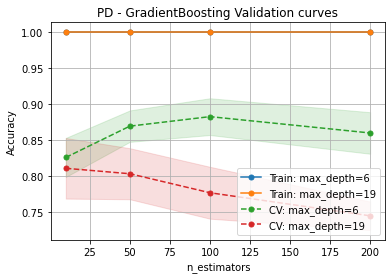

In [171]:
gbm_validation_curve1 = gbm_res_df.xs((1.0, 6), level=('learning_rate', 'max_depth'))
gbm_validation_curve2 = gbm_res_df.xs((1.0, 19), level=('learning_rate', 'max_depth'))
means = [gbm_validation_curve1['mean_train_score'], gbm_validation_curve2['mean_train_score'], gbm_validation_curve1['mean_test_score'], gbm_validation_curve2['mean_test_score']]
stds = [gbm_validation_curve1['std_train_score'], gbm_validation_curve2['std_train_score'], gbm_validation_curve1['std_test_score'], gbm_validation_curve2['std_test_score']]
labels = ['Train: max_depth=6', 'Train: max_depth=19', 'CV: max_depth=6', 'CV: max_depth=19']

plot_means_w_stds(means,stds,gbm_paramGrid['n_estimators'], series_labels=labels, ylabel='Accuracy', xlabel='n_estimators', logx=False, title='PD - GradientBoosting Validation curves', legend=True)

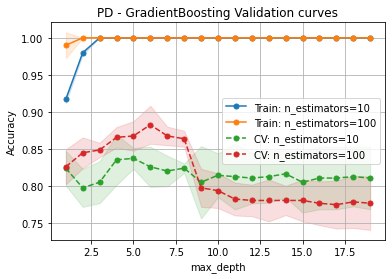

In [172]:
gbm_validation_curve1 = gbm_res_df.xs((1.0, 10), level=('learning_rate', 'n_estimators'))
gbm_validation_curve2 = gbm_res_df.xs((1.0, 100), level=('learning_rate', 'n_estimators'))
means = [gbm_validation_curve1['mean_train_score'], gbm_validation_curve2['mean_train_score'], gbm_validation_curve1['mean_test_score'], gbm_validation_curve2['mean_test_score']]
stds = [gbm_validation_curve1['std_train_score'], gbm_validation_curve2['std_train_score'], gbm_validation_curve1['std_test_score'], gbm_validation_curve2['std_test_score']]
labels = ['Train: n_estimators=10', 'Train: n_estimators=100', 'CV: n_estimators=10', 'CV: n_estimators=100']

plot_means_w_stds(means,stds,gbm_paramGrid['max_depth'], series_labels=labels, ylabel='Accuracy', xlabel='max_depth', logx=False, title='PD - GradientBoosting Validation curves', legend=True)

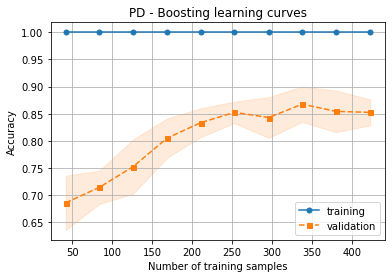

In [208]:
boosting_clf1 = gbm(n_estimators=100, learning_rate = 1, max_depth=6, random_state= 2)
train_sizes1, train_mean1, train_std1, test_mean1, test_std1 = gen_and_plot_learning_curve(boosting_clf1, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='PD - Boosting learning curves')

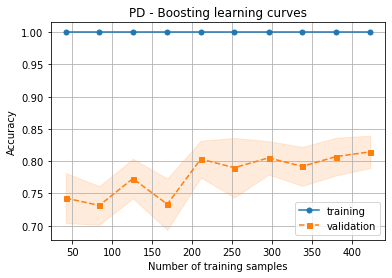

In [174]:
boosting_clf2 = gbm(n_estimators=50, learning_rate =0.1, max_depth=15, random_state= 2)
train_sizes2, train_mean2, train_std2, test_mean2, test_std2 = gen_and_plot_learning_curve(boosting_clf2, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='PD - Boosting learning curves')

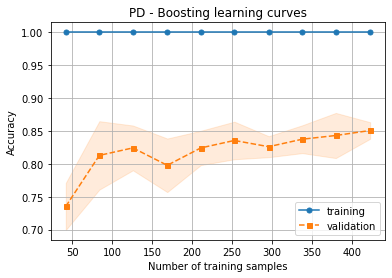

In [175]:
boosting_clf3 = gbm(n_estimators=50, learning_rate = 1, max_depth=3, random_state= 2)
train_sizes3, train_mean3, train_std3, test_mean3, test_std3 = gen_and_plot_learning_curve(boosting_clf3, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='PD - Boosting learning curves')

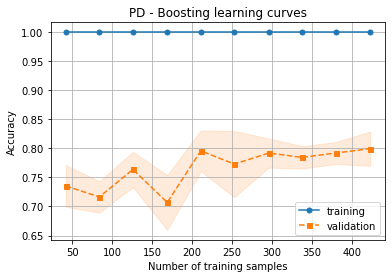

In [177]:
boosting_clf4 = gbm(n_estimators=50, learning_rate = 1, max_depth=15, random_state= 2)
train_sizes4, train_mean4, train_std4, test_mean4, test_std4 = gen_and_plot_learning_curve(boosting_clf4, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='PD - Boosting learning curves')

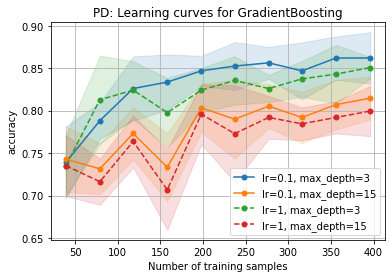

In [176]:
# compare boosting
plot_means_w_stds(
    (test_mean1, test_mean2, test_mean3, test_mean4),
    (test_std1, test_std2, test_std3, test_std4),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['lr=0.1, max_depth=3', 'lr=0.1, max_depth=15', 'lr=1, max_depth=3', 'lr=1, max_depth=15'],
    title='PD: Learning curves for GradientBoosting'
)

In [262]:
# calculate test set accuracy 
start_time = time.time()
boosting_clf1.fit(X_train_scaled, y_train)
end_time = time.time()
boosting_time = end_time - start_time

y_test_pred1 = boosting_clf1.predict(X_test_scaled)

print('lr=0.1, max_depth=3, Accuracy=', metrics.accuracy_score(y_test, y_test_pred1))
boosting_test_score = metrics.accuracy_score(y_test, y_test_pred1)

# calculate test set accuracy 
boosting_clf2.fit(X_train_scaled, y_train)
y_test_pred2 = boosting_clf2.predict(X_test_scaled)


print('lr=0.1, max_depth=15, Accuracy=', metrics.accuracy_score(y_test, y_test_pred2))

# calculate test set accuracy 
boosting_clf3.fit(X_train_scaled, y_train)
y_test_pred3 = boosting_clf3.predict(X_test_scaled)

print('lr=1, max_depth=3, Accuracy=', metrics.accuracy_score(y_test, y_test_pred3))

# calculate test set accuracy 
boosting_clf4.fit(X_train_scaled, y_train)
y_test_pred4 = boosting_clf4.predict(X_test_scaled)

print('lr=1, max_depth=15, Accuracy=', metrics.accuracy_score(y_test, y_test_pred4))


lr=0.1, max_depth=3, Accuracy= 0.8634361233480177
lr=0.1, max_depth=15, Accuracy= 0.7929515418502202
lr=1, max_depth=3, Accuracy= 0.8193832599118943
lr=1, max_depth=15, Accuracy= 0.7665198237885462


# Part 4: Neural Networks

In [96]:
from sklearn.neural_network import MLPClassifier

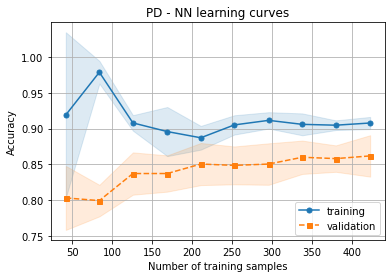

In [178]:
nn_clf1 = MLPClassifier(hidden_layer_sizes =3, activation='identity', max_iter = 200)
train_sizes1, train_mean1, train_std1, test_mean1, test_std1 = gen_and_plot_learning_curve(nn_clf1, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='PD - NN learning curves')

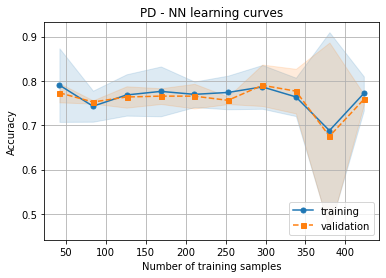

In [179]:
nn_clf1 = MLPClassifier(hidden_layer_sizes =3, activation='logistic', max_iter = 200)
train_sizes1, train_mean1, train_std1, test_mean1, test_std1 = gen_and_plot_learning_curve(nn_clf1, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='PD - NN learning curves')

In [221]:
nn_clf = MLPClassifier(hidden_layer_sizes =2, activation='identity')

nn_paramGrid = {
    'hidden_layer_sizes': np.array([10, 50, 100, 200, 400, 600]).astype('int'),
    'max_iter': np.logspace(1, 4, 4).astype('int'),
    'activation': np.array(['identity', 'logistic', 'tanh', 'relu'])
}
nn_paramGrid

{'hidden_layer_sizes': array([ 10,  50, 100, 200, 400, 600]),
 'max_iter': array([   10,   100,  1000, 10000]),
 'activation': array(['identity', 'logistic', 'tanh', 'relu'], dtype='<U8')}

In [229]:
nn_gs = GridSearchCV(
    estimator=nn_clf,
    param_grid=nn_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [230]:
nn_gs.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   33.6s
/Users/jian/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 112 tasks     

GridSearchCV(cv=4,
             estimator=MLPClassifier(activation='identity',
                                     hidden_layer_sizes=2),
             n_jobs=-1,
             param_grid={'activation': array(['identity', 'logistic', 'tanh', 'relu'], dtype='<U8'),
                         'hidden_layer_sizes': array([ 10,  50, 100, 200, 400, 600]),
                         'max_iter': array([   10,   100,  1000, 10000])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [231]:
nn_gs.best_estimator_

MLPClassifier(hidden_layer_sizes=600, max_iter=1000)

In [232]:
#NN
nn_res_df = scikit_cv_result_to_df(nn_gs.cv_results_)

nn_res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  \
activation hidden_layer_sizes max_iter                                
relu       600                10000         38.511274      0.443786   
                              1000          37.821719      7.945248   
           200                1000          17.553579      2.629918   
           400                1000          30.680129      2.795207   
           200                10000         17.375765      1.164634   
...                                               ...           ...   
tanh       10                 10             0.053549      0.014356   
relu       10                 10             0.052368      0.003219   
logistic   10                 10             0.050658      0.007549   
           50                 10             0.123271      0.008620   
           200                10             0.400048      0.046564   

                                        mean_score_time  std_score_time  \
activation hidden_layer_sizes max_iter                                    
relu       600                10000            0.070536        0.038050   
                              1000             0.022567        0.005839   
           200                1000             0.007958        0.000713   
           400                1000             0.016379        0.004645   
           200                10000            0.007117        0.003557   
...                                                 ...             ...   
tanh       10                 10               0.000847        0.000074   
relu       10                 10               0.001637        0.000798   
logistic   10                 10               0.001722        0.000747   
           50                 10               0.001823        0.000907   
           200                10               0.005290        0.001454   

                                        mean_test_score  std_test_score  \
activation hidden_layer_sizes max_iter                                    
relu       600                10000            0.873248        0.044782   
                              1000             0.873248        0.044136   
           200                1000             0.873234        0.045738   
           400                1000             0.873234        0.046976   
           200                10000            0.871355        0.045934   
...                                                 ...             ...   
tanh       10                 10               0.754258        0.006336   
relu       10                 10               0.752364        0.003105   
logistic   10                 10               0.752364        0.003105   
           50                 10               0.752364        0.003105   
           200                10               0.752364        0.003105   

                                        rank_test_score  mean_train_score  \
activation hidden_layer_sizes max_iter                                      
relu       600                10000                   1          1.000000   
                              1000                    1          0.998741   
           200                1000                    3          1.000000   
           400                1000                    4          1.000000   
           200                10000                   5          1.000000   
...                                                 ...               ...   
tanh       10                 10                     92          0.757401   
relu       10                 10                     93          0.752363   
logistic   10                 10                     93          0.752363   
           50                 10                     93          0.752363   
           200                10                     93          0.754252   

                                        std_train_score  
activation hidden_layer_sizes max_iter                   
relu       600                10000           

In [233]:
relu = nn_res_df.xs('relu', level='activation')
logistic = nn_res_df.xs('logistic', level='activation')

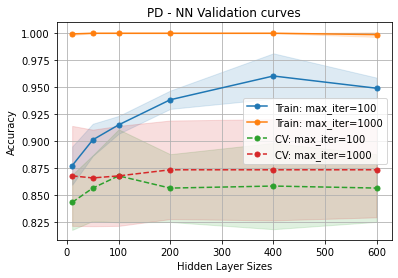

In [237]:
# 
validation_curve1 = nn_res_df.xs((100, 'relu'), level=('max_iter', 'activation'))
validation_curve2 = nn_res_df.xs((1000, 'relu'), level=('max_iter', 'activation'))
means = [validation_curve1['mean_train_score'], validation_curve2['mean_train_score'], validation_curve1['mean_test_score'], validation_curve2['mean_test_score']]
stds = [validation_curve1['std_train_score'], validation_curve2['std_train_score'], validation_curve1['std_test_score'], validation_curve2['std_test_score']]
labels = ['Train: max_iter=100', 'Train: max_iter=1000', 'CV: max_iter=100', 'CV: max_iter=1000']

plot_means_w_stds(means,stds,nn_paramGrid['hidden_layer_sizes'], series_labels=labels, ylabel='Accuracy', xlabel='Hidden Layer Sizes', logx=False, title='PD - NN Validation curves', legend=True)

# plot_means_w_stds(
#     means=(relu['mean_train_score'], logistic['mean_train_score'], relu['mean_test_score'], logistic['mean_test_score']),
#     stds=(relu['std_train_score'], logistic['std_train_score'], relu['std_test_score'], logistic['std_test_score']),
#     xrange=paramGrid['hidden_layer_sizes'],
#     xlabel='hidden_layer_sizes',
#     ylabel='Accuracy',
#     series_labels=('relu: training', 'logistic: training', 'relu: CV', 'logistic: CV'),
#     title='Speech - NN validation curves',
#     ylim=None,
#     markersize=None
# )

{'C': 10.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100.0, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


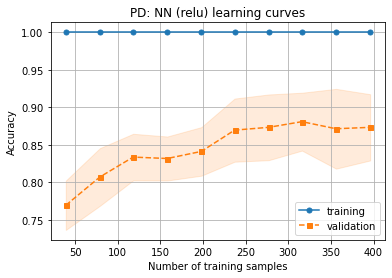

In [238]:
# Learning Curve _NN
#RBF SVM learning curve
nn_clf = nn_gs.best_estimator_
print(best_clf.get_params())
train_sizes, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(nn_clf, X_train_scaled, y_train, 
                                                                                      scoring='accuracy', ylabel='Accuracy', cv=4, n_jobs=-1, title='PD: NN (relu) learning curves')

In [263]:
# calculate test set accuracy 
start_time = time.time()
nn_clf.fit(X_train_scaled, y_train)
end_time = time.time()
nn_time = end_time - start_time

y_test_pred1 = nn_clf.predict(X_test_scaled)
print(metrics.accuracy_score(y_test, y_test_pred1))
nn_test_score = metrics.accuracy_score(y_test, y_test_pred1)

0.9030837004405287


# Part 5: K - Nearest Neighbors

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn_clf = KNeighborsClassifier()
knn_paramGrid = {
    'n_neighbors': np.linspace(1, 20, 20).astype('int'),
    'algorithm': np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
}
knn_paramGrid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 'algorithm': array(['auto', 'ball_tree', 'kd_tree', 'brute'], dtype='<U9')}

In [115]:
knn_gs = GridSearchCV(
    estimator=knn_clf,
    param_grid=knn_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [132]:
knn_gs.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1525s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 320 out

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': array(['auto', 'ball_tree', 'kd_tree', 'brute'], dtype='<U9'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [133]:
knn_gs.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [134]:
knn_res_df = scikit_cv_result_to_df(knn_gs.cv_results_)

knn_res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
algorithm n_neighbors                                                 
kd_tree   11                0.015462      0.002542         0.025102   
ball_tree 11                0.017590      0.001553         0.042076   
brute     11                0.009624      0.002268         0.014910   
auto      11                0.015154      0.002411         0.024832   
          16                0.016877      0.003511         0.022668   
...                              ...           ...              ...   
          1                 0.029285      0.006229         0.031136   
brute     2                 0.007536      0.002219         0.018674   
kd_tree   2                 0.017552      0.002907         0.028255   
ball_tree 2                 0.019255      0.003069         0.032492   
auto      2                 0.021982      0.002917         0.026966   

                       std_score_time  mean_test_score  std_test_score  \
algorithm n_neighbors                                                    
kd_tree   11                 0.005101         0.778737        0.033653   
ball_tree 11                 0.011552         0.778737        0.033653   
brute     11                 0.003477         0.778737        0.033653   
auto      11                 0.005359         0.778737        0.033653   
          16                 0.007310         0.776843        0.036188   
...                               ...              ...             ...   
          1                  0.001936         0.667236        0.034814   
brute     2                  0.003106         0.635068        0.035689   
kd_tree   2                  0.002789         0.635068        0.035689   
ball_tree 2                  0.002382         0.635068        0.035689   
auto      2                  0.004938         0.635068        0.035689   

                       rank_test_score  mean_train_score  std_train_score  
algorithm n_neighbors                                                      
kd_tree   11                         1          0.804019         0.013111  
ball_tree 11                         1          0.804019         0.013111  
brute     11                         1          0.804019         0.013111  
auto      11                         1          0.804019         0.013111  
          16                         5          0.787006         0.015982  
...                                ...               ...              ...  
          1                         73          1.000000         0.000000  
brute     2                         77          0.834904         0.012460  
kd_tree   2                         77          0.834904         0.012460  
ball_tree 2                         77          0.834904         0.012460  
auto      2                         77          0.834904         0.012460  

[80 rows x 9 columns]

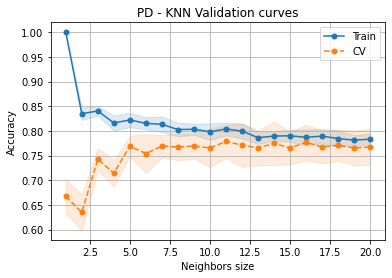

In [210]:
knn_validation_curve1 = knn_res_df.xs(('auto'), level=('algorithm'))
means = [knn_validation_curve1['mean_train_score'], knn_validation_curve1['mean_test_score'] ]
stds = [knn_validation_curve1['std_train_score'], knn_validation_curve1['std_test_score'] ]
labels = ['Train', 'CV']

plot_means_w_stds(means,stds,knn_paramGrid['n_neighbors'], series_labels=labels, ylabel='Accuracy', xlabel='Neighbors size', logx=False, title='PD - KNN Validation curves', legend=True)


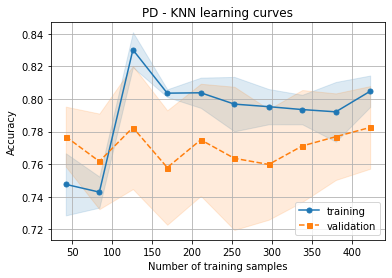

In [211]:
knn_clf = KNeighborsClassifier(n_neighbors=11)
train_sizes, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(knn_clf, X_train, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='PD - KNN learning curves')

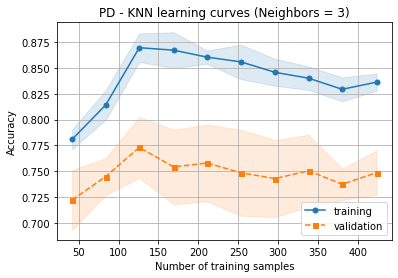

In [184]:
knn_clf2 = KNeighborsClassifier(n_neighbors=3)
train_sizes2, train_mean2, train_std2, test_mean2, test_std2 = gen_and_plot_learning_curve(knn_clf2, X_train, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='PD - KNN learning curves (Neighbors = 3)')

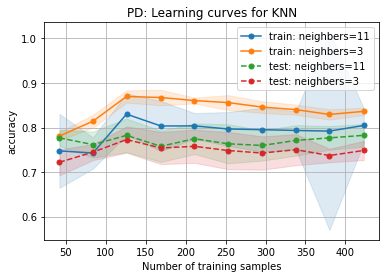

In [185]:
# compare neighbors size
plot_means_w_stds(
    (train_mean, train_mean2, test_mean, test_mean2),
    (train_std1, train_std2, test_std, test_std2),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['train: neighbers=11', 'train: neighbers=3', 'test: neighbers=11', 'test: neighbers=3'],
    title='PD: Learning curves for KNN'
)

In [264]:
# calculate test set accuracy 
start_time = time.time()
knn_clf.fit(X_train, y_train)
end_time = time.time()
knn_time = end_time - start_time

y_test_pred = knn_clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred))
knn_test_score = metrics.accuracy_score(y_test, y_test_pred)

0.7004405286343612


In [140]:
knn_clf2.fit(X_train, y_train)
y_test_pred2 = knn_clf2.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred2))

0.6828193832599119


# compare above 5 algorithms

In [246]:
print(dt_test_score)
print(svm_test_score)
print(boosting_test_score)
print(nn_test_score)
print(knn_test_score)

0.8237885462555066
0.9118942731277533
0.8634361233480177
0.8590308370044053
0.7004405286343612


In [247]:
models = ['DT', 'SVM', 'Boosting', 'NN', 'KNN']
test_scores = [dt_test_score, svm_test_score, boosting_test_score, nn_test_score, knn_test_score]

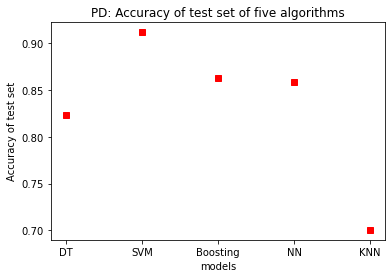

In [254]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('models')
plt.ylabel('Accuracy of test set')
plt.title('PD: Accuracy of test set of five algorithms')
ax.plot(models, test_scores, 's', color='red')


In [266]:
# fit times.
times = [dt_time, svm_time, boosting_time, nn_time, knn_time]
print(times)

[0.1343240737915039, 0.2065727710723877, 13.449106931686401, 11.560265064239502, 0.04830789566040039]


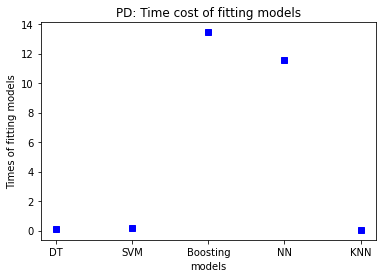

In [267]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.xlabel('models')
plt.ylabel('Times of fitting models')
plt.title('PD: Time cost of fitting models')
ax2.plot(models, times, 's', color='blue')